# 546 (Optimization for Learning and Control) hw2

You are welcome (and encouraged) to work with others, but each individual must submit their own writeup.

You are welcome to use your preferred computational toolkit -- upload the **commented** sourcecode alongside your writeup (e.g. the .ipynb file).

You are welcome to consult research articles and other materials -- upload a .pdf of the article alongside your writeup and indicate which references were used where in the writeup.

## linear quadratic regulation (16 pts)

Consider the discrete-time linear quadratic regulator problem (DT-LQR)

$$\min_u c_\tau (x,u) \ \text{s.t.} \ x_{s+1} = A_s x_s + B_s u_s,$$
$$c_\tau(x,u) = \frac{1}{2} x_t^\top P_t x_t + \frac{1}{2}\sum_{s=\tau}^{t-1} x_s^\top Q_s x_s + u_s^\top R_s u_s$$

where $P_t$, $\{Q_s\}_{s=\tau}^{t-1}$, $\{R_s\}_{s=\tau}^{t-1}$ are given symmetric positive-definite matrices.

In this problem, you'll apply Bellman's dynamic programming principle to determine the optimal control, then verify this control is the same one obtained by a descent algorithm.

a. Determine the optimal control and value at time $\tau = t$ (i.e. minimize $c_t$ with respect to $u_t$, and let $v^*_t = c_t(x^*,u^*)$ denote the optimal value that can be obtained at time $t$).

<font color='red'>
The problem description can be written in math form as:
$$\min_{u_t} c_{\tau=t}(x,u) = \frac{1}{2} x_t^\top P_t x_t + \frac{1}{2}\sum_{s=\tau=t}^{t-1} x_s^\top Q_s x_s + u_s^\top R_s u_s $$
$$\min_{u_t} c_{t}(x,u) = \frac{1}{2} x_t^\top P_t x_t$$
Since by definition (and a change of variable),
$$x_{t} = A_{t-1} x_{t-1} + B_{t-1}u_{t-1}$$
Substituting $x_t$ in $c_t(x,u)$, we can conclude that equation $c_t(x,u) = \frac{1}{2} x_t^T P_t x_t$ is independent of $u_t$, thus any input is optimal.
For simplicity, I will choose $u_t^* = 0$.  The optimal value is 
$$v_t^* = c_t = \frac{1}{2} x_t^T P_t x_t$$
</font>

b. Determine the optimal control and value at time $\tau = t-1$ (i.e. minimize $c_{t-1}$ with respect to $u_{t-1}$, and let $v^*_{t-1} = c_{t-1}(x^*,u^*)$ denote the optimal value that can be obtained at time $t-1$).

<font color='red'>
First, let's put $c_{t-1}$ in math form
$$c_{\tau=t-1}(x,u) = \frac{1}{2} x_t^\top P_t x_t + \frac{1}{2}\sum_{s=\tau=t-1}^{t-1} x_s^\top Q_s x_s + u_s^\top R_s u_s $$
$$c_{t-1}(x,u) = \frac{1}{2} x_t^\top P_t x_t +\frac{1}{2} x_{t-1}^\top Q_{t-1} x_{t-1} +\frac{1}{2} u_{t-1}^\top R_{t-1} u_{t-1}$$
Substituting $x_t = A_{t-1} x_{t-1} + B_{t-1} u_{t-1}$ and differentiating $c_{t-1}$ with respect to $u_{t-1}$, we find
$$ D_{u_{t-1}} c_{t-1} = (A_{t-1} x_{t-1} + B_{t-1} u_{t-1})^T P_t B_{t-1}+u_{t-1}^T R_{t-1} $$
Solving $D_{u_{t-1}} c_{t-1} = 0$ for $u_{t-1}^*$ yields
$$ u_{t-1}^* = -(B_{t-1}^T P_t B_{t-1} + R_{t-1})^{-1} B_{t-1}^T P_t A_{t-1} x_{t-1}. $$
Notice that $D_{u_{t-1}}^2 c_{t-1} = R_{t-1} + B_{t-1}^T P_t B_{t-1}$, which is a symmetric positive-definite matrix, so the input we computed is a strict local minimizer. With that said, we'll derive a simplified expression for the optimal value in the next step.
</font>

c. Note that the optimal control is linear in state and the optimal value is quadratic in state (i.e. determine $K_{t-1}$ and $P_{t-1}$ such that $u_{t-1} = K_{t-1} x_{t-1}$ and $v^*_{t-1} = c_{t-1}(x^*,u^*) = x_{t-1}^T P_{t-1} x_{t-1}$).

<font color='red'>
Define $K_{t-1} = (B_{t-1}^T P_t B_{t-1} + R_{t-1})^{-1} B_{t-1}^T P_t A_{t-1}$ so that the optimal input at time $t-1$ is
$$ u_{t-1}^* = -(B_{t-1}^T P_t B_{t-1} + R_{t-1})^{-1} B_{t-1}^T P_t A_{t-1} x_{t-1}. $$
$$ u_{t-1}^* = -K_{t-1} x_{t-1}. $$
Now let's revisit the equation
$$c_{t-1}(x,u) = \frac{1}{2} (x_t^\top P_t x_t + x_{t-1}^\top Q_{t-1} x_{t-1} + u_{t-1}^\top R_{t-1} u_{t-1})$$
Substituting $x_t = A_{t-1} x_{t-1} + B_{t-1} u_{t-1}$
$$c_{t-1}(x,u) = \frac{1}{2} \left[(A_{t-1} x_{t-1} + B_{t-1} u_{t-1})^\top P_t (A_{t-1} x_{t-1} + B_{t-1} u_{t-1}) + x_{t-1}^\top Q_{t-1} x_{t-1} + u_{t-1}^\top R_{t-1} u_{t-1}\right]$$
Replacing $u_{t-1}$ with $u_{t-1}^*=-K_{t-1} x_{t-1}$ the optimal value becomes
$$c_{t-1}(x^*,u^*) = \frac{1}{2} \left[(A_{t-1} x_{t-1} - B_{t-1}K_{t-1} x_{t-1})^\top P_t (A_{t-1} x_{t-1} - B_{t-1}K_{t-1} x_{t-1}) + x_{t-1}^\top Q_{t-1} x_{t-1} + x_{t-1}^\top K_{t-1}^\top  R_{t-1} K_{t-1} x_{t-1}\right]$$
$$ c_{t-1}(x^*,u^*) = \frac{1}{2} x_{t-1}^T \left[ (A_{t-1} - B_{t-1} K_{t-1})^T P_t (A_{t-1} - B_{t-1} K_{t-1}) + Q_{t-1} + K_{t-1}^T R_{t-1} K_{t-1} \right] x_{t-1}; $$
To make the notation more concise, we rewrite
$$ v_{t-1}^* = c_{t-1}(x^*,u^*) = \frac{1}{2} x_{t-1}^T P_{t-1} x_{t-1}; $$
,where $P_{t-1}= (A_{t-1} - B_{t-1} K_{t-1})^T P_t (A_{t-1} - B_{t-1} K_{t-1}) + Q_{t-1} + K_{t-1}^T R_{t-1} K_{t-1}  $.
</font>

d. Use the substitution in (c.) to generalize the calculation in (b.) to derive a recursive formula to compute the optimal control and value at any time $s\in [\tau,t]$.

<font color='red'>
We can prove by induction that suppose
$$ K_s = (B_{s}^T P_{s+1} B_{s} + R_{s})^{-1} B_{s}^T P_{s+1} A_{s} $$
$$ P_s = (A_{s} - B_{s} K_{s})^T P_{s+1} (A_{s} - B_{s} K_{s}) + Q_{s} + K_{s}^T R_{s} K_{s}$$
, then the optimal input and optimal value at any time $s$ are respectively
$$ u_s^* = -K_s x_s$$
$$ v_s^* = \frac{1}{2} x_s^T P_s x_s$$
This means that if we assume $A$, $B$, $Q$, $R$ and $P_t$ are known from the system, we can recursively find $K_s$ and $P_s$ in the reverse time order (i.e. $s = t-1,t-2,...$).
</font>
 $$$$
<font color='red'>
Note that the recursion for $P_s$ is termed a *Riccati* difference equation; it is nonlinear, so not trivial to predict its asymptotic behavior as $s\rightarrow-\infty$.  It turns out that if $A$, $B$, $Q$, and $R$ are constant and $(A,B)$ is controllable, then the limit $\lim_{s\rightarrow-\infty} P_s = P$ is well-defined and $P$ satisfies the *discrete algebraic Riccati equation* $A^T P A - (A^T P B)(R + B^T P B)^{-1}(B^T P A) + Q$.
</font>

e. Implement the recursion in (d.) numerically for the following system, which is a discretized linear spring-mass-damper (let $\kappa,\beta,q,r,\Delta > 0$ be parameters that you can easily vary in your implementation):

$$A^\Delta = I + \Delta \left[\begin{array}{cc} 0 & 1 \\ -\kappa & -\beta \end{array}\right],\ B^\Delta = \Delta \left[\begin{array}{c} 0 \\ 1 \end{array}\right],\ P_t = 0,\ Q^\Delta_s = q \cdot \Delta \cdot I,\ R^\Delta_s = r \cdot \Delta \cdot I.$$

<font color='red'>
We can implement the system as such:
</font>

In [ ]:
import numpy as np
from scipy import linalg as la

def riccati(A,B,Q,R,P):
    # optimal control is linear state feedback 
    K_ = np.dot( la.inv(np.dot(B.T,np.dot(P,B)) + R), np.dot(B.T,np.dot(P,A)) )
    # optimal value is quadratic in state
    P_ = np.dot( (A - np.dot(B,K_)).T, np.dot(P, (A - np.dot(B,K_))) + Q + np.dot(K_.T, np.dot(R, K_)) )
    return K_,P_

n = 2
m = 1

def lqr(t,kappa=1,beta=1,q=1,r=1,Delta=1e-1):
    A = np.identity(n) + Delta * np.array([[0,1],[-kappa,-beta]])
    B = Delta * np.array([[0],[1]])
    Q = q * np.identity(n) # running state cost
    R = r * np.identity(m) # running control cost

    K = np.zeros((t,m,n)) # linear state feedback gain matrix
    P = np.zeros((t+1,n,n)) # cost-to-go

    Pt = np.zeros((n,n)) # final state cost
    P[t] = Pt

    # loop over times
    for s in range(t)[::-1]: # loop backward in time
        K[s],P[s] = riccati(A,B,Q,R,P[s+1])
        
    return A,B,Q,R,K,P

f. Investigate how the optimal controls vary with respect to the ratio $q/r$ (i.e. let $q/r$ range from $0.1$ to $10$, compute the optimal control input, describe the trend you observe, and provide a visualization that clearly illustrates this trend).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


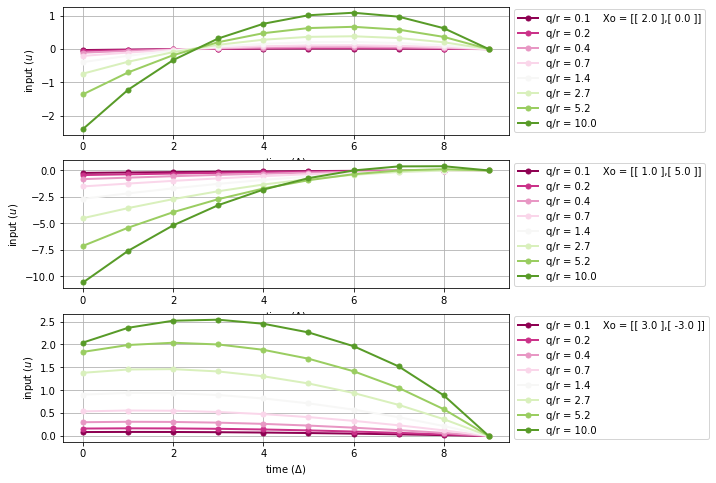

In [ ]:
from matplotlib import cm
import pylab as plt

# plot variables
lw = 2   # line width
ms = 10  # marker
fig = plt.figure(figsize=(8,8)); plt.clf()

# a list of initial conditions
Xo_list = [[[2],[0]],[[1],[5]],[[3],[-3]]] # TODO: can change here

# system variables
t = 10                    # final time
num_q = 8                 # number of q/r tests to consider
num_e = len(Xo_list)      # number of experiments



# start experiments
for exp in range(num_e):
  u = np.zeros((t,m,1))
  v = np.zeros((t))
  x = np.zeros((t+1,n,1))
  x[0] = Xo_list[exp]

  Xo_str = "    Xo = [[ %0.1f ]," % x[0][0]+"[ %0.1f ]]"% x[0][1]

  for c,q in enumerate(np.logspace(-1,1,num=num_q)):

      A,B,Q,R,K,P = lqr(t,q=q,r=1.)   # find all the system matrices
      for s in range(t):
          u[s] = np.dot(-K[s],x[s])                          # calculate optimal input
          v[s] = 0.5 * np.dot( x[s].T, np.dot(P[s], x[s]) )  # calculate optimal value        
          x[s+1] = np.dot(A,x[s]) + np.dot(B, u[s])          # calculate next state
          
      # illustrate optimal input over time
      plt.subplot(num_e,1,exp+1); plt.grid('on')
      plt.plot(u[:,0,0],'.-',lw=lw,ms=ms,color=cm.PiYG(1.*c/num_q),label="q/r = "+"%0.1f" % q+Xo_str)
      plt.ylabel(r'input ($u$)')
      plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
      plt.xlabel(r'time ($\Delta$)')
      Xo_str = ""

<font color='red'>
From the plots, we notice when state error $q$ is much more costly than input effort $r$ (green curves), optimal inputs tend to have greater magnitude so the state error decreases faster. Contrarily, when $q/r$ is small (pink curves), small inputs are applied and state error decreases slowly.
</font>

g. Verify your implementation in (e.) by applying a descent algorithm to approximate the optimal input on time horizon $t = 10\cdot\Delta$ and $t = 100\cdot\Delta$ for the following initial conditions with $\kappa,\beta,q,r = 1$, $\Delta = 0.1$:

$$x_1 = (1,0),\ x_2 = (0,1).$$

***Hint:*** you can directly apply ***simple random search***, or use ***finite differences*** to approximate the gradient.  To apply ***steepest descent*** or ***Newton-Raphson***, you'll need to analytically differentiate the cost with respect to the control input applied at each timestep.

<font color='red'>
First, lets use the DT-LQR approach to determine a series of optimal inputs (pink curves). Then, we can try calculating the optimal inputs using random search algorithm (green curves). Finally, we illustratively compare the results by showing both the state trajectory and input over time plot. We can notice that although the input sequence dont necessarily look similar, the overall state x seem to spiral inward toward (0,0) which is a good sign. Also, the Dt-LQR method drives input to approach 0 as time moves alongs.
</font>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


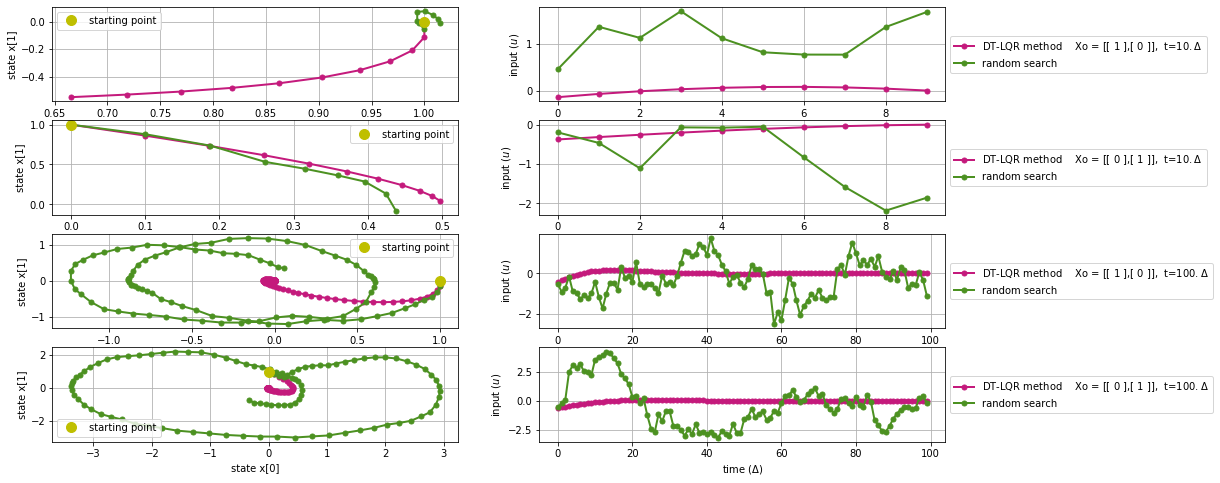

In [ ]:
from matplotlib import cm
import pylab as plt
from scipy.misc import derivative
import random

# plot variables
lw = 2   # line width
ms = 10  # marker
fig = plt.figure(figsize=(16,8)); plt.clf()

# a list of initial conditions
Xo_list = [[[1],[0]],[[0],[1]]] 

# system variables
Delta = 0.1                      # time step
t_list = [10,100]                # final time
num_e = len(Xo_list)             # number of experiments
cnt = 0                          # a counter that keeps track of iterations

# cost function
def c(w,xo,t):
  x = np.zeros((t+1,n,1))
  x[0] = xo
  c = 0.
  for s in range(t):
      c += 0.5 * np.dot(x[s].T, np.dot(Q, x[s])) + np.dot(w[s].T, np.dot(R, w[s])) 
      x[s+1] = np.dot(A,x[s]) + np.dot(B,w[s])  
  return c,x

def random_search(u,s,t,xo):
  step = 0.1
  u_tmp = u
  v_best = float('inf')
  for i in range(100):
    u_tmp[s] = u[s]+random.uniform(-step,step)
    v_tmp, x_tmp = c(u_tmp[:s],xo,s)
    if v_tmp < v_best:
      u_best = u_tmp       # calculate optimal input
      v_best = v_tmp       # calculate optimal value   
      x_best = x_tmp       # calculate next state
  return u_best, v_best, x_best


# start experiments
for t in t_list:
  for exp in range(num_e):
    ## ======================== DT-LQR method ======================== 
    u = np.zeros((t,m,1))
    v = np.zeros((t))
    x = np.zeros((t+1,n,1))
    cnt = cnt + 1
    x[0] = Xo_list[exp]
    Xo_str = "    Xo = [[ %0.f ]," % x[0][0]+"[ %0.f ]]"% x[0][1]

    A,B,Q,R,K,P = lqr(t,Delta=Delta)   # find all the system matrices
    for s in range(t):
        u[s] = np.dot(-K[s],x[s])                          # calculate optimal input
        v[s] = 0.5 * np.dot( x[s].T, np.dot(P[s], x[s]) )  # calculate optimal value        
        x[s+1] = np.dot(A,x[s]) + np.dot(B, u[s])          # calculate next state
        
    # illustrate optimal input over time
    plt.subplot(len(t_list)*num_e,2,2*cnt); plt.grid('on')
    plt.plot(u[:,0,0],'.-',lw=lw,ms=ms,color=cm.PiYG(0.1),label="DT-LQR method"+Xo_str+",  t=%0.f$.\Delta$"%t)
    plt.ylabel(r'input ($u$)')
    plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
    plt.xlabel(r'time ($\Delta$)')
    plt.subplot(len(t_list)*num_e,2,2*cnt-1); plt.grid('on')
    plt.plot(x[:,0,0],x[:,1,0],'.-',lw=lw,ms=ms,color=cm.PiYG(0.1))
    plt.ylabel(r'state x[1]')
    plt.xlabel(r'state x[0]')

    ##  ===================== random search method ===================== 
    u_prev = u[0]
    u = np.zeros((t,m,1))
    v = np.zeros((t))
    x = np.zeros((t+1,n,1))
    x[0] = Xo_list[exp]
    u[0] = u_prev
    for s in range(t):
      v[s] = float('Inf')
      if s > 0:
        u[s] = u[s-1]
      u, v[s], x[:s+1,:,:] = random_search(u,s,t,x[0])
 
    # illustrate optimal input over time
    plt.subplot(len(t_list)*num_e,2,2*cnt); plt.grid('on')
    plt.plot(u[:,0,0],'.-',lw=lw,ms=ms,color=cm.PiYG(0.9),label="random search")
    plt.ylabel(r'input ($u$)')
    plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
    plt.xlabel(r'time ($\Delta$)')
    plt.subplot(len(t_list)*num_e,2,2*cnt-1); plt.grid('on')
    plt.plot(x[:t-1,0,0],x[:t-1,1,0],'.-',lw=lw,ms=ms,color=cm.PiYG(0.9))
    plt.plot(x[0,0,0],x[0,1,0],'o',lw=lw,ms=ms,color='y',label="starting point")
    plt.legend(loc="best")
    plt.ylabel(r'state x[1]')
    plt.xlabel(r'state x[0]')

***Bonus:*** analytically differentiate the cost with respect to the control input applied at each timestep one or two times to implement ***steepest descent*** or ***Newton-Raphson*** algorithms to approximate the optimal control.

h. Now consider the infinite time-horizon problem with time-invariant dynamics:

$$\min_u c(x,u) \ \text{s.t.} \ x_{s+1} = A x_s + B u_s,$$
$$c(x,u) = \frac{1}{2}\sum_{s=0}^{\infty} x_s^\top Q x_s + u_s^\top R u_s,$$

where $A$, $B$, $Q$, and $R$ do not vary in time.  Noting that the system from (e.) is time-invariant, solve the LQR problem on an "infinite" time horizon:  iterate the recursion from (d.) many times and plot the entries of the $P$ matrix versus iteration number.  Compare with the result obtained from solving the ***discrete algebraic Riccati equation***

$$ X = (A - B K)^\top X (A - B K) + K^\top R K + Q,\ K = (B^\top X B + R)^{-1} B^\top X A $$

using the `solve_discrete_are` routine from the `scipy.linalg` module ***or*** the `dare` routine from the `python-control` module (execute `!pip install python-control` in Colab to make this module available).

<font color='red'>
In this problem, we compare the DT-LQR solutions from the finite horizon and infinite horizon case. First, lets use the DT-LQR approach which is the same as the approach we used in problem (g) to determine a series of optimal inputs (pink curves). Then, we can try calculating the optimal inputs using infinite time horison `solve_discrete_are` routine (green curves). Finally, we illustratively compare the results. As one may notice, as the number of iterations increases, the control input sequence from the finite horizon case gets closer to the infinite time horison solution. 
</font>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:78: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


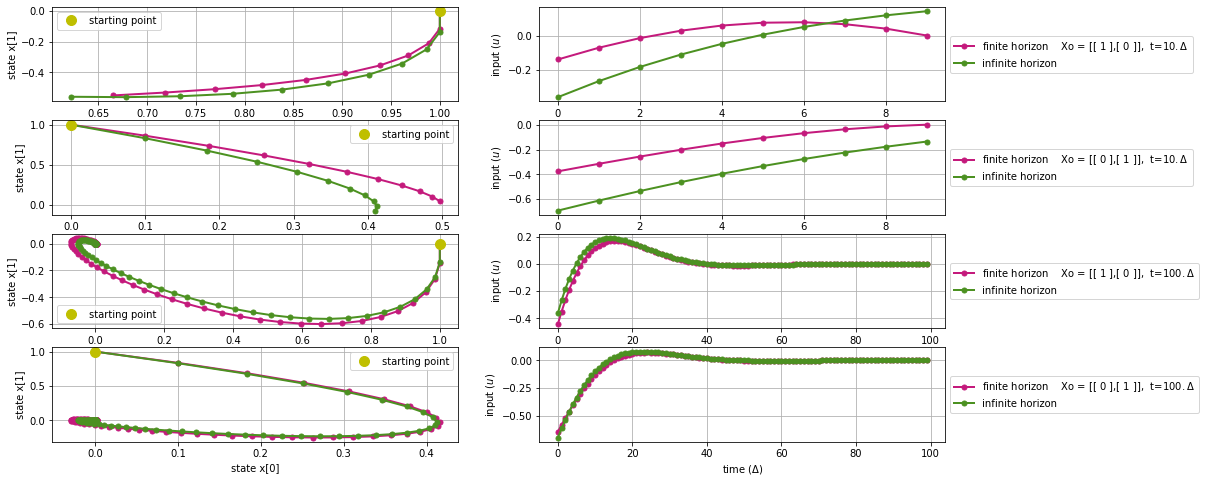

In [ ]:
from matplotlib import cm
import pylab as plt
from scipy.misc import derivative
import random

# plot variables
lw = 2   # line width
ms = 10  # marker
fig = plt.figure(figsize=(16,8)); plt.clf()

# a list of initial conditions
Xo_list = [[[1],[0]],[[0],[1]]] 

# system variables
Delta = 0.1                      # time step
t_list = [10,100]                # final time
num_e = len(Xo_list)             # number of experiments
cnt = 0                          # a counter that keeps track of iterations

def discete_are(A,B,Q,R):
    """Solve the infinite time horizon discrete time lqr controller.

    x[k+1] = A x[k] + B u[k]
     
    cost = sum x[k].T*Q*x[k] + u[k].T*R*u[k]
    """
    # Riccati Recursion: the min-cost-to-go matrix 
    # Try to solve the ricatti equation, Bertsekas, p.151
    X = np.matrix(scipy.linalg.solve_discrete_are(A, B, Q, R))
    #compute the LQR gain
    K_are = np.matrix(scipy.linalg.inv(B.T*X*B+R)*(B.T*X*A))     
    return K_are

# start experiments
for t in t_list:
  for exp in range(num_e):
    ## ======================== finite horizon ======================== 
    u = np.zeros((t,m,1))
    v = np.zeros((t))
    x = np.zeros((t+1,n,1))
    cnt = cnt + 1
    x[0] = Xo_list[exp]
    Xo_str = "    Xo = [[ %0.f ]," % x[0][0]+"[ %0.f ]]"% x[0][1]

    A,B,Q,R,K,P = lqr(t,Delta=Delta)   # find all the system matrices
    for s in range(t):
        u[s] = np.dot(-K[s],x[s])                          # calculate optimal input
        v[s] = 0.5 * np.dot( x[s].T, np.dot(P[s], x[s]) )  # calculate optimal value        
        x[s+1] = np.dot(A,x[s]) + np.dot(B, u[s])          # calculate next state
        
    # illustrate optimal input over time
    plt.subplot(len(t_list)*num_e,2,2*cnt); plt.grid('on')
    plt.plot(u[:,0,0],'.-',lw=lw,ms=ms,color=cm.PiYG(0.1),label="finite horizon"+Xo_str+",  t=%0.f$.\Delta$"%t)
    plt.ylabel(r'input ($u$)')
    plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
    plt.xlabel(r'time ($\Delta$)')
    plt.subplot(len(t_list)*num_e,2,2*cnt-1); plt.grid('on')
    plt.plot(x[:,0,0],x[:,1,0],'.-',lw=lw,ms=ms,color=cm.PiYG(0.1))
    plt.ylabel(r'state x[1]')
    plt.xlabel(r'state x[0]')

    ##  ===================== infinite horizon ===================== 
    u = np.zeros((t,m,1))
    v = np.zeros((t))
    x = np.zeros((t+1,n,1))
    x[0] = Xo_list[exp]
    K_are = discete_are(A,B,Q,R)
    for s in range(t):
      u[s] = np.dot(-K_are,x[s])                  # calculate input
      x[s+1] = np.dot(A,x[s]) + np.dot(B, u[s])   # calculate next state

    # illustrate optimal input over time
    plt.subplot(len(t_list)*num_e,2,2*cnt); plt.grid('on')
    plt.plot(u[:,0,0],'.-',lw=lw,ms=ms,color=cm.PiYG(0.9),label="infinite horizon")
    plt.ylabel(r'input ($u$)')
    plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
    plt.xlabel(r'time ($\Delta$)')
    plt.subplot(len(t_list)*num_e,2,2*cnt-1); plt.grid('on')
    plt.plot(x[:,0,0],x[:,1,0],'.-',lw=lw,ms=ms,color=cm.PiYG(0.9))
    plt.plot(x[0,0,0],x[0,1,0],'o',lw=lw,ms=ms,color='y',label="starting point")
    plt.legend(loc="best")
    plt.ylabel(r'state x[1]')
    plt.xlabel(r'state x[0]')

# paper presentation (8pts)

Recall that you will review and present a paper as part of this class; these elements are worth 30% of the grade.  More details and guidelines are provided on the course Syllabus:
  https://canvas.uw.edu/courses/1352564
  
***You must obtain approval for your selected paper prior to submitting this writeup*** -- one third of the credit for this assignment (8/24 points) are earned for selecting an approved paper and entering the paper and presentation information in the shared Google Doc (linked at Canvas -> Collaborations).

The papers provided in the following research literature repository are pre-approved; so long as no one else has claimed the paper when you enter the information in the Google Doc, no further action is needed:
  https://paperpile.com/shared/x8K3ux
  
If you want to present a paper that isn't in the repository, you must meet with Prof Burden to discuss the paper you want to present.  ***If you are unable to attend Prof Burden's office hours before this assignment's deadline, you must send him a message to schedule an ad-hoc appointment by Fri Jan 31 with your availability Feb 3--6.***